In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from IPython.display import display #viewing dataframes
import matplotlib.pyplot as plt #matplotlib for graphs
from pandas.plotting import scatter_matrix #see relationships between our variables
plt.style.use('fivethirtyeight') #make our graphs look pretty

In [2]:
path = "/Users/Theo/Desktop/Big_Data_Challenge/"
covid_data = pd.read_csv(path + "covid19.csv")
covid_data["prname"].unique()

array(['Ontario', 'British Columbia', 'Canada', 'Quebec', 'Alberta',
       'Repatriated travellers', 'Saskatchewan', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Prince Edward Island', 'Yukon', 'Northwest Territories',
       'Nunavut'], dtype=object)

In [3]:
covid_data.dtypes

pruid               int64
prname             object
prnameFR           object
date               object
numconf             int64
numprob             int64
numdeaths         float64
numtotal            int64
numtested         float64
numrecover        float64
percentrecover    float64
ratetested        float64
numtoday          float64
percentoday       float64
ratetotal         float64
dtype: object

In [4]:
def dateFixer(date):
    list = date.split("-")
    list[0], list[2] = list[2], list[0]
    return "-".join(list)

In [5]:
covid_data["date"] = covid_data["date"].map(lambda x: dateFixer(x))
covid_data["date"] = covid_data["date"].astype("datetime64")
covid_data["date"]

0      2020-01-31
1      2020-01-31
2      2020-01-31
3      2020-02-08
4      2020-02-08
          ...    
1102   2020-05-19
1103   2020-05-19
1104   2020-05-19
1105   2020-05-19
1106   2020-05-19
Name: date, Length: 1107, dtype: datetime64[ns]

In [6]:
latest_covid = covid_data[covid_data["date"] == "2020-05-19"]
latest_covid

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,percentoday,ratetotal
1092,59,British Columbia,Colombie-Britannique,2020-05-19,2444,0,143.0,2444,105952.0,1966.0,80.44,20892.0,NaN,NaN,48.192
1093,48,Alberta,Alberta,2020-05-19,6683,0,128.0,6683,199237.0,5519.0,82.58,45578.0,NaN,NaN,152.883
1094,47,Saskatchewan,Saskatchewan,2020-05-19,592,0,6.0,592,38064.0,455.0,76.86,32410.0,NaN,NaN,50.406
1095,46,Manitoba,Manitoba,2020-05-19,279,11,7.0,290,34892.0,257.0,88.62,25479.0,NaN,NaN,21.176
1096,35,Ontario,Ontario,2020-05-19,23384,0,1919.0,23384,541489.0,17898.0,76.54,37173.0,NaN,NaN,160.532
1097,24,Quebec,Québec,2020-05-19,43627,0,3596.0,43627,335232.0,12045.0,27.61,39509.0,NaN,NaN,514.168
1098,10,Newfoundland and Labrador,Terre-Neuve-et-Labrador,2020-05-19,260,0,3.0,260,10744.0,249.0,95.77,20600.0,NaN,NaN,49.852
1099,13,New Brunswick,Nouveau-Brunswick,2020-05-19,120,0,0.0,120,19453.0,120.0,100.00,25042.0,NaN,NaN,15.447
1100,12,Nova Scotia,Nouvelle-Écosse,2020-05-19,1043,0,55.0,1043,37594.0,946.0,90.70,38701.0,NaN,NaN,107.371
1101,11,Prince Edward Island,Île-du-Prince-Édouard,2020-05-19,27,0,0.0,27,4761.0,27.0,100.00,30335.0,NaN,NaN,17.203


In [7]:
healthChar = pd.read_csv(path + "healthCharacteristics/13100096.csv")

In [8]:
healthChar = healthChar[(healthChar["REF_DATE"] == 2018) & (healthChar["GEO"] != "Canada (excluding territories)") & (healthChar["Sex"] == "Both sexes") & (healthChar["Characteristics"] == "Percent")]

In [9]:
healthChar = healthChar[["REF_DATE", "GEO", "Age group", "Sex", "Indicators", "Characteristics", "VALUE", ]]
healthChar["Indicators"].unique()

array(['Perceived health, very good or excellent',
       'Perceived health, fair or poor',
       'Perceived mental health, very good or excellent',
       'Perceived mental health, fair or poor',
       'Perceived life stress, most days quite a bit or extremely stressful',
       'Body mass index, adjusted self-reported, adult (18 years and over), overweight',
       'Body mass index, adjusted self-reported, adult (18 years and over), obese',
       'Body mass index, self-reported, youth (12 to 17 years old), overweight or obese',
       'Arthritis (15 years and over)', 'Diabetes', 'Asthma',
       'Chronic obstructive pulmonary disease (COPD; 35 years and over)',
       'High blood pressure', 'Mood disorder',
       'Current smoker, daily or occasional', 'Current smoker, daily',
       'Heavy drinking',
       'Self-reported physical activity, 150 minutes per week, adult (18 years and over)',
       'Self-reported physical activity, average 60 minutes per day, youth (12 to 17 years 

In [10]:
merged_Data = healthChar.merge(latest_covid, left_on = "GEO", right_on = "prname", how = "outer")

In [11]:
merged_Data = merged_Data.drop("numtoday", axis = 1, errors = "ignore")
merged_Data = merged_Data.drop("percentoday", axis = 1, errors = "ignore")
merged_Data = merged_Data.drop("pruid", axis = 1, errors = "ignore")
merged_Data = merged_Data.drop("prname", axis = 1, errors = "ignore")
merged_Data = merged_Data.drop("prnameFR", axis = 1, errors = "ignore")
merged_Data = merged_Data.drop("date", axis = 1, errors = "ignore")
merged_Data = merged_Data.drop("numprob", axis = 1, errors = "ignore")
merged_Data = merged_Data.drop("REF_DATE", axis = 1, errors = "ignore")
merged_Data = merged_Data.dropna()
merged_Data["percentconf"] = merged_Data["numconf"] / merged_Data["numtested"] * 100
merged_Data["percentdeath"] = merged_Data["numdeaths"] / merged_Data["numconf"] * 100
merged_Data

,GEO,Age group,Sex,Indicators,Characteristics,VALUE,numconf,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,ratetotal,percentconf,percentdeath
0,Newfoundland and Labrador,"Total, 12 years and over",Both sexes,"Perceived health, very good or excellent",Percent,60.5,260,3.0,260,10744.0,249.0,95.77,20600.0,49.852,2.419955,1.153846
1,Newfoundland and Labrador,"Total, 12 years and over",Both sexes,"Perceived health, fair or poor",Percent,14.3,260,3.0,260,10744.0,249.0,95.77,20600.0,49.852,2.419955,1.153846
2,Newfoundland and Labrador,"Total, 12 years and over",Both sexes,"Perceived mental health, very good or excellent",Percent,69.2,260,3.0,260,10744.0,249.0,95.77,20600.0,49.852,2.419955,1.153846
3,Newfoundland and Labrador,"Total, 12 years and over",Both sexes,"Perceived mental health, fair or poor",Percent,6.9,260,3.0,260,10744.0,249.0,95.77,20600.0,49.852,2.419955,1.153846
4,Newfoundland and Labrador,"Total, 12 years and over",Both sexes,"Perceived life stress, most days quite a bit o...",Percent,14.9,260,3.0,260,10744.0,249.0,95.77,20600.0,49.852,2.419955,1.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,British Columbia,65 years and over,Both sexes,"Self-reported physical activity, 150 minutes p...",Percent,51.3,2444,143.0,2444,105952.0,1966.0,80.44,20892.0,48.192,2.306705,5.851064
1505,British Columbia,65 years and over,Both sexes,"Sense of belonging to local community, somewha...",Percent,77.5,2444,143.0,2444,105952.0,1966.0,80.44,20892.0,48.192,2.306705,5.851064
1506,British Columbia,65 years and over,Both sexes,"Life satisfaction, satisfied or very satisfied",Percent,91.0,2444,143.0,2444,105952.0,1966.0,80.44,20892.0,48.192,2.306705,5.851064
1507,British Columbia,65 years and over,Both sexes,Has a regular healthcare provider,Percent,94.1,2444,143.0,2444,105952.0,1966.0,80.44,20892.0,48.192,2.306705,5.851064


In [22]:
merged_Data_senior_highBP = merged_Data[(merged_Data["Indicators"] == "Heavy drinking") & (merged_Data["Age group"] == "65 years and over")]
merged_Data_senior_highBP

,GEO,Age group,Sex,Indicators,Characteristics,VALUE,numconf,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,ratetotal,percentconf,percentdeath
141,Newfoundland and Labrador,65 years and over,Both sexes,Heavy drinking,Percent,11.2,260,3.0,260,10744.0,249.0,95.77,20600.0,49.852,2.419955,1.153846
292,Prince Edward Island,65 years and over,Both sexes,Heavy drinking,Percent,7.8,27,0.0,27,4761.0,27.0,100.00,30335.0,17.203,0.567108,0.000000
443,Nova Scotia,65 years and over,Both sexes,Heavy drinking,Percent,8.5,1043,55.0,1043,37594.0,946.0,90.70,38701.0,107.371,2.774379,5.273250
594,New Brunswick,65 years and over,Both sexes,Heavy drinking,Percent,7.0,120,0.0,120,19453.0,120.0,100.00,25042.0,15.447,0.616871,0.000000
745,Quebec,65 years and over,Both sexes,Heavy drinking,Percent,9.0,43627,3596.0,43627,335232.0,12045.0,27.61,39509.0,514.168,13.013972,8.242602
896,Ontario,65 years and over,Both sexes,Heavy drinking,Percent,6.2,23384,1919.0,23384,541489.0,17898.0,76.54,37173.0,160.532,4.318463,8.206466
1047,Manitoba,65 years and over,Both sexes,Heavy drinking,Percent,7.1,279,7.0,290,34892.0,257.0,88.62,25479.0,21.176,0.799610,2.508961
1198,Saskatchewan,65 years and over,Both sexes,Heavy drinking,Percent,8.6,592,6.0,592,38064.0,455.0,76.86,32410.0,50.406,1.555275,1.013514
1349,Alberta,65 years and over,Both sexes,Heavy drinking,Percent,7.2,6683,128.0,6683,199237.0,5519.0,82.58,45578.0,152.883,3.354297,1.915307
1500,British Columbia,65 years and over,Both sexes,Heavy drinking,Percent,7.3,2444,143.0,2444,105952.0,1966.0,80.44,20892.0,48.192,2.306705,5.851064


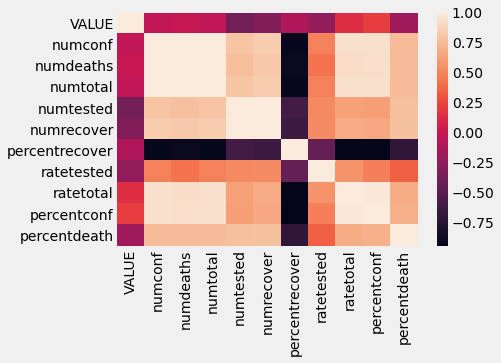

In [23]:
corr = merged_Data_senior_highBP.corr()
sns.heatmap(corr)

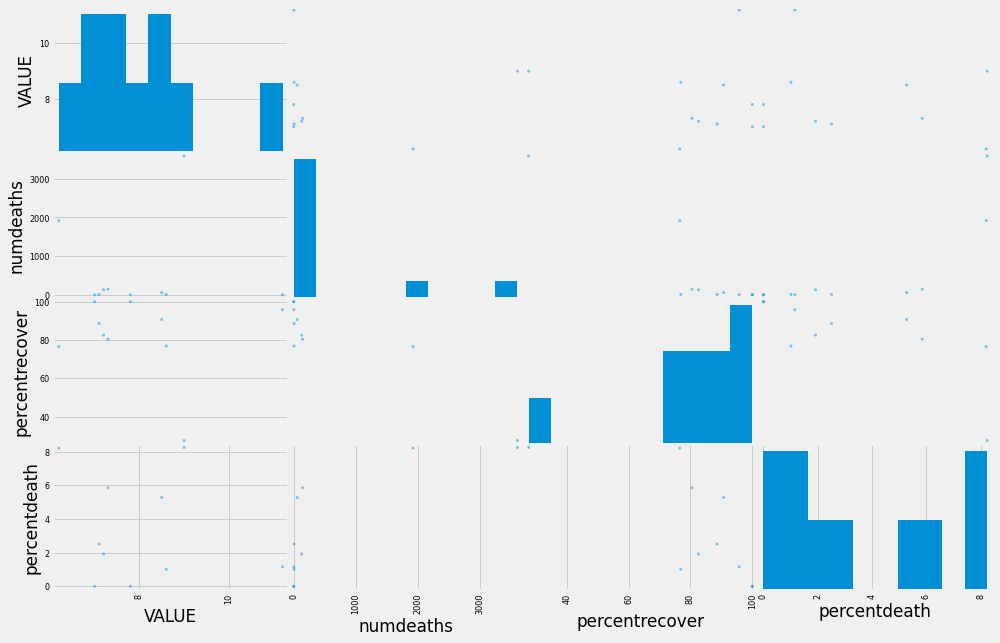

In [24]:
scatter_matrix(merged_Data_senior_highBP[["VALUE", "numdeaths", "percentrecover", "percentdeath"]], figsize = (15,10));